In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [126]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [127]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [128]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [129]:
type(df)

pandas.core.frame.DataFrame

**Checking for null values**

In [130]:
df.isnull().sum().sum()

0

no null value present

In [131]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [132]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

**Extraction**

In [133]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


M    1528
I    1342
F    1307
Name: Sex, dtype: int64


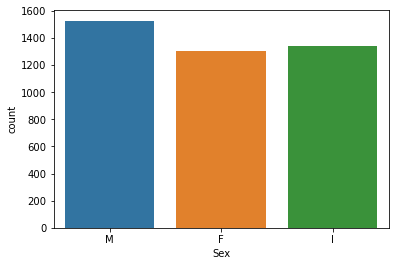

In [134]:
sns.countplot(x="Sex",data=df)
print(df["Sex"].value_counts())

Total number of Male is 1528, total number of female is 1307 and infant is 1342

In [135]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [136]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [137]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [138]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [139]:
df.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

<AxesSubplot:xlabel='Rings', ylabel='Length'>

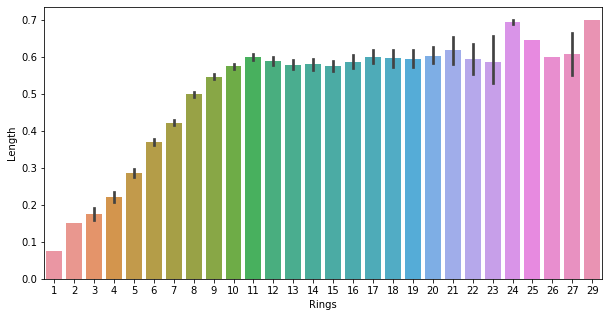

In [140]:
#Length vs rings

plot = plt.figure(figsize=(10,5))
sns.barplot(x='Rings', y = 'Length', data=df)

Maximum number of rings present is 29 and larger lenght has large number of rings

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

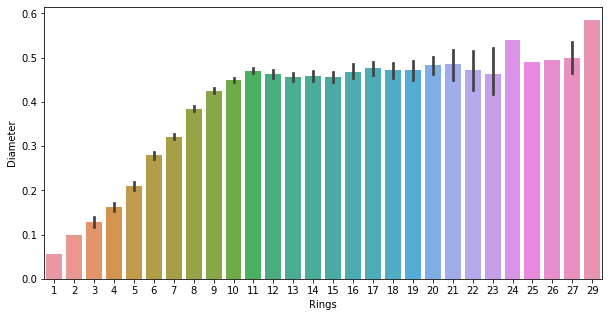

In [141]:
#Diameter vs rings

plot = plt.figure(figsize=(10,5))
sns.barplot(x='Rings', y = 'Diameter', data=df)

From above observations larger the diameter larger the rings

<AxesSubplot:xlabel='Rings', ylabel='Height'>

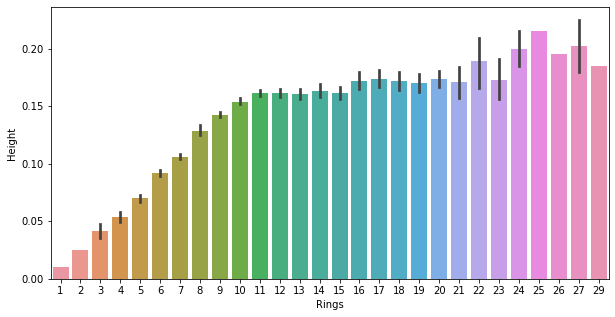

In [142]:
#Height vs rings

plot = plt.figure(figsize=(10,5))
sns.barplot(x='Rings', y = 'Height', data=df)

increased hight has 23 to 29 rings

<AxesSubplot:xlabel='Rings', ylabel='Whole weight'>

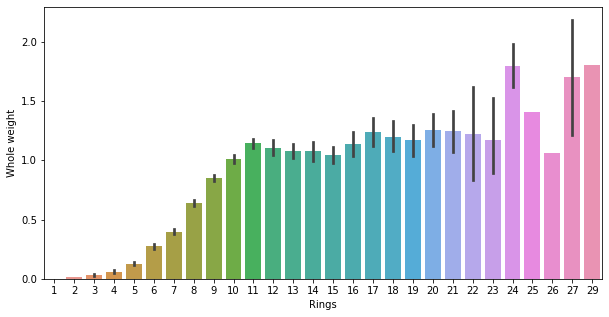

In [143]:
#Whole weight vs rings

plot = plt.figure(figsize=(10,5))
sns.barplot(x='Rings', y = 'Whole weight', data=df)

<AxesSubplot:xlabel='Rings', ylabel='Shucked weight'>

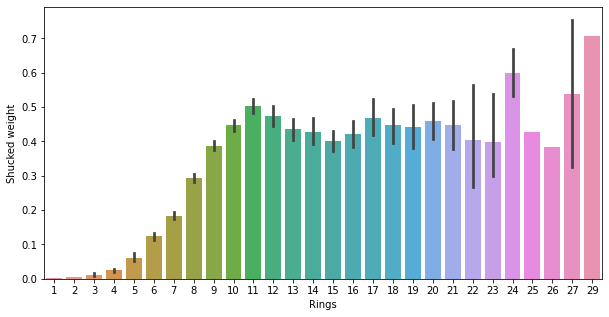

In [144]:
#Shucked weight vs rings

plot = plt.figure(figsize=(10,5))
sns.barplot(x='Rings', y = 'Shucked weight', data=df)

<AxesSubplot:xlabel='Rings', ylabel='Viscera weight'>

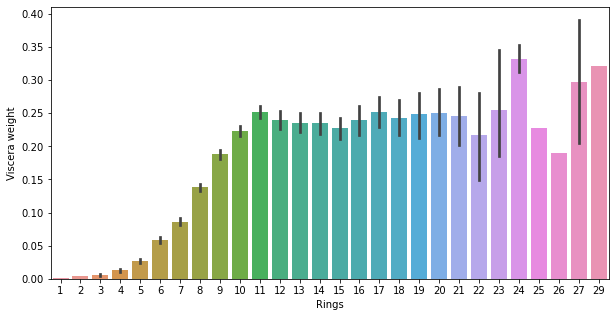

In [145]:
#Viscera weight vs rings

plot = plt.figure(figsize=(10,5))
sns.barplot(x='Rings', y = 'Viscera weight', data=df)

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

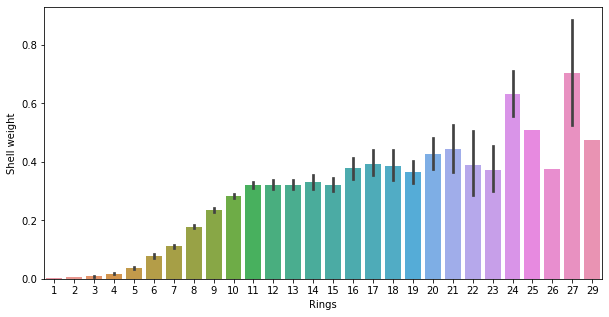

In [146]:
#Viscera weight vs rings

plot = plt.figure(figsize=(10,5))
sns.barplot(x='Rings', y = 'Shell weight', data=df)

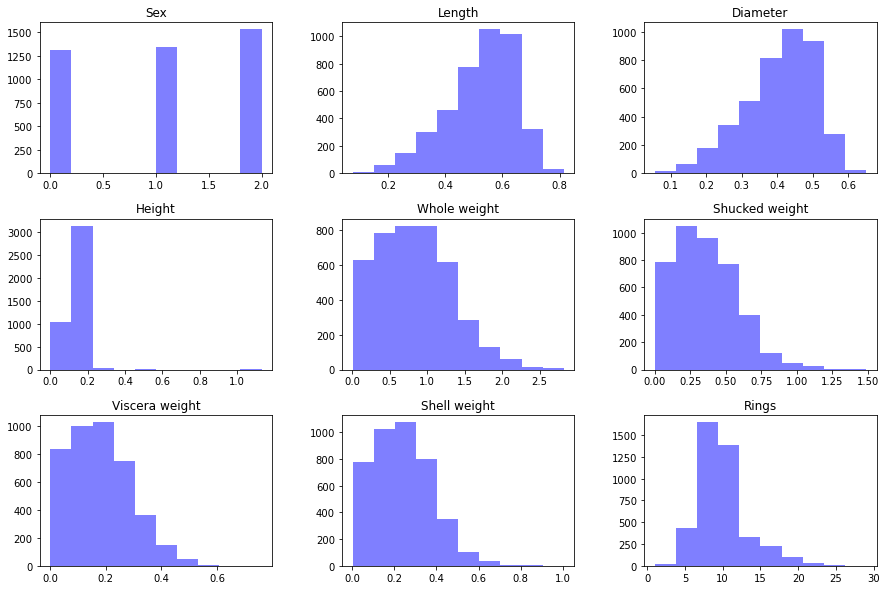

In [147]:
df.hist(figsize=(15,10),grid=False, alpha=0.5, color='blue');

dataset is not normaly distributed, has imbalance data which has to be taken care.

**Correlation**

In [148]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

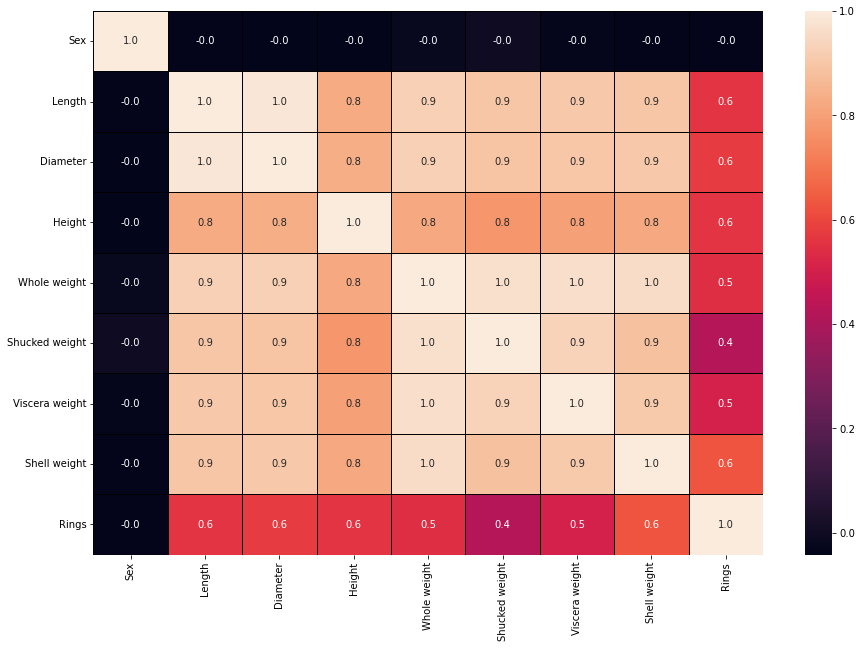

In [149]:

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cbar=True, linewidths=0.5,linecolor="black", fmt='.1f')

In [150]:
#calculate and round off correlation matrix

corrM = (df.iloc[:,:8].corr()).values
corrM = np.around(corrM, decimals = 3)

In [151]:
#print correlation with 'Rings' feature
feature_importance = (df.iloc[:,:8].corr()).iloc[:-1, -1].sort_values(ascending=False)
print('Features in Descending Order of Importance', list(feature_importance.index))


Features in Descending Order of Importance ['Whole weight', 'Viscera weight', 'Diameter', 'Length', 'Shucked weight', 'Height', 'Sex']


in our case any input can be said to belong to an abalone of age in the range of [1,29]. Hence, ours is a multi-class classification problem.

In [152]:
y = df["Rings"]
X = df.drop(columns="Rings")
#because we are training the model to predict Rings, we will remove it from our dataset and pass it separately.

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**K-nearest Neighbours (KNN)**

In [158]:
#hyperparameter k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

#hyperparameter k=5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.23803827751196172
0.23444976076555024


We get accuracy of 0.2380 and 0.2344 for k=3 and k=5 respectively.

 **Logistic Regression**

In [159]:

logr = LogisticRegression(multi_class = 'ovr', random_state=3)

# training classifier
logr.fit(X_train, y_train)
print(logr.score(X_test, y_test))

0.23923444976076555


We get an accuracy of 0.2392.

**Decision Trees**

In [161]:

dt = DecisionTreeClassifier(random_state=0, max_depth = 3)
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))


0.24641148325358853


We get an accuracy of 0.2464.